# Virtual Power with a Blackburn Tech Fluid Trainer 
I purchased a Blackburn Tech Fluid indoor trainer last year. With the help of an ANT+ dongle ([wiki/ANT+](https://en.wikipedia.org/wiki/ANT%2B)) and the brilliant open source software [GoldenCheetah](http://www.goldencheetah.org/) one can built a virtual power meter. A slightly longer description of the background can be found e.g. [here](http://thebikegeek.blogspot.de/2009/12/while-we-wait-for-better-and-better.html); in short: the relationship between power and speed is almost fixed for this type of trainer as there is minimal coasting and, unlike most magnetic resistance based trainers, only one resistance setting. Thus, given the speed sent by any ANT+ speed sensor and received from the dongle, applied power can be calculated if the relationship is known. The relationship or characteristic power curve looks something like this:
![alt text](pics/bb_tech_fluid_power_curve_1.jpg "Presumably wrong power curve of the Blackburn Tech Fluid")

This power curve can be modeled by a polynomial equation like $y=a_0 + a_1 x+ a_2 x^2$. GoldenCheetah already implements a number of equations for  respective indoor trainers but unfortunately not for the Tech Fluid. The power curve can be either obtained by using a real power meter, which can also capture setup specifics, or (as in this case) be published by the manufacturer. The customer support of Blackburn kindly sent me two power curves, which are not equivalent. I used the one below instead of the one above which seems way off:
![alt text](pics/bb_tech_fluid_power_curve_2.jpg "Presumably right power curve of the Blackburn Tech Fluid")

From the given image I roughly estimated following points:


In [8]:
import pandas as pd

index = [i + 1 for i in range(13)]
d = {'x': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60], 'y': [0, 5, 15, 30, 75, 110, 160, 220, 310, 415, 510, 625, 760]}
df = pd.DataFrame(data=d, index=index)
df

,x,y
1,0,0
2,5,5
3,10,15
4,15,30
5,20,75
6,25,110
7,30,160
8,35,220
9,40,310
10,45,415


Fit polynom to the data points using linear regression (from [this helpful example](http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html)):

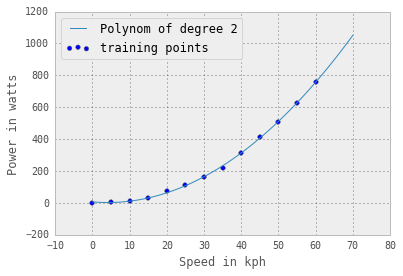

a_0: 6.758241758241894
a_1: -1.9995004995004955
a_2: 0.24165834165834146


''

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x_plot = np.linspace(0, 70, 100)
X = df.as_matrix(['x'])
# Require matrix version of x_plot array
X_plot = x_plot[:, np.newaxis]

# Plot data points
plt.scatter(df['x'], df['y'], label='training points')

# Transform input data matrices to matrices of degree 2
degree = 2
poly = PolynomialFeatures(degree=degree)
X = poly.fit_transform(X)
X_plot = poly.fit_transform(X_plot)

# Fit polynom
model = LinearRegression()
model.fit(X, df['y'])
y_plot = model.predict(X_plot)
plt.plot(x_plot, y_plot, label='Polynom of degree {0}'.format(degree))

plt.legend(loc='upper left')
plt.xlabel('Speed in kph')
plt.ylabel('Power in watts')
plt.show()
print('a_0: {0}'.format(model.intercept_))
print('a_1: {0}'.format(model.coef_[1]))
print('a_2: {0}'.format(model.coef_[2]))
;

Thus, the power $y$ can be calculated by $y=6.76-2.00x+0.24x^2$ where $x$ is the speed.